# Descriptive Analysis

Loading the Dataset

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('insurance.csv')

 Preview the data

In [68]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


 Get info about data types and missing values

In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [70]:
# Summary statistics for numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


 Summary statistics

In [71]:
# Include all columns, including categorical ones
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Checking for Unique Values in Categorical Columns

In [72]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [73]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [74]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [75]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Example for a single numerical column
#sns.boxplot(data=df, y='charges')  # Replace 'charges' with your column name
#plt.title("Box Plot for Charges")
#plt.show()


# Outlier Detection and Elimination

Focusing on numerical columns like age, bmi, and charges.

using IQR method technique

In [76]:
#IQR method example for detecting outliers in 'charges'
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

In [77]:
IQR

11899.625365

In [78]:
# Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [79]:
outliers = df[(df['charges'] < df['charges'].quantile(0.25) - 1.5 * (df['charges'].quantile(0.75) - df['charges'].quantile(0.25))) | 
              (df['charges'] > df['charges'].quantile(0.75) + 1.5 * (df['charges'].quantile(0.75) - df['charges'].quantile(0.25)))]


In [80]:
outliers 

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [81]:
# Filtering out outliers
df_clean = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

In [82]:
# IQR method example for detecting outliers in ' bmi'
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

In [83]:
IQR

8.3975

In [84]:
# Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [85]:

# Filtering out outliers
df_clean = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Feature Relationships & Summary Statistics

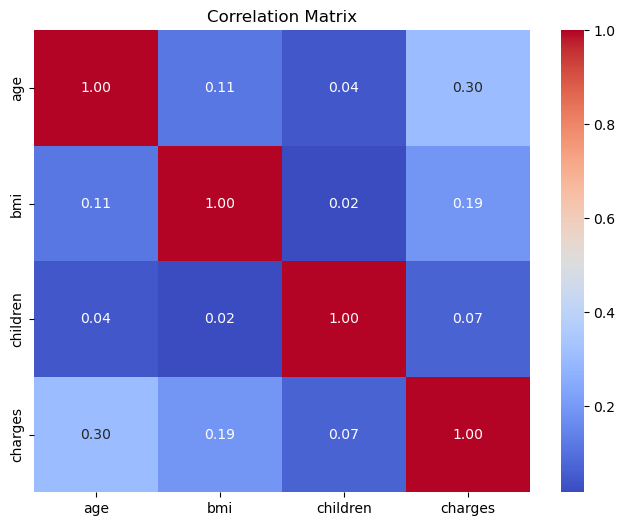

In [86]:
# Compute correlation matrix
corr = df_clean.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Pairwise Relationships (Visual)

In [87]:
#sns.pairplot(df, hue='smoker')
#plt.show()


In [88]:
#Exporting Cleaned Data for Power BI
#df_clean.to_csv('cleaned_insurance_data.csv', index=False)

In [89]:
#SimpleImputer: Fills missing values with the most frequent category.
#StandardScaler: Standardizes values (zero mean and unit variance).
#OneHotEncoder(drop='first'): Converts categories to binary variables
#ColumnTransformer runs the numeric pipeline on numeric_features, and the categorical pipeline on categorical_features, all at once.


## PREPROCESSING FOR MACHINE LEARNING

In [90]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Define column types
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations
X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed.shape


(1338, 8)

In [91]:
# 1. Extract numeric part
X_num = preprocessor.named_transformers_['num'].transform(X[numeric_features])
X_num_df = pd.DataFrame(X_num, columns=numeric_features)
print(X_num_df.head())

        age       bmi  children
0 -1.438764 -0.453320 -0.908614
1 -1.509965  0.509621 -0.078767
2 -0.797954  0.383307  1.580926
3 -0.441948 -1.305531 -0.908614
4 -0.513149 -0.292556 -0.908614


In [92]:
# 2. Extract categorical part
X_cat = preprocessor.named_transformers_['cat'].transform(X[categorical_features])
cat_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
X_cat_df = pd.DataFrame(X_cat.toarray(), columns=cat_columns)
print("\n One-Hot Encoded Categorical Data:")
print(X_cat_df.head())


 One-Hot Encoded Categorical Data:
   sex_male  smoker_yes  region_northwest  region_southeast  region_southwest
0       0.0         1.0               0.0               0.0               1.0
1       1.0         0.0               0.0               1.0               0.0
2       1.0         0.0               0.0               1.0               0.0
3       1.0         0.0               1.0               0.0               0.0
4       1.0         0.0               1.0               0.0               0.0


In [93]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Apply PCA to reduce features (let's reduce to 4 principal components)
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train.shape, X_train_pca.shape


((1070, 8), (1070, 4))

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR()
}

# Function to train and evaluate models
def evaluate_models(X_tr, X_te, y_tr, y_te):
    results = {}
    for name, model in models.items():
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        mse = mean_squared_error(y_te, y_pred)
        r2 = r2_score(y_te, y_pred)
        results[name] = {"MSE": mse, "R2 Score": r2}
    return results

# Evaluate models on original and PCA-reduced features
results_original = evaluate_models(X_train, X_test, y_train, y_test)
results_pca = evaluate_models(X_train_pca, X_test_pca, y_train, y_test)

results_original, results_pca


({'Linear Regression': {'MSE': 33596915.851361476,
   'R2 Score': 0.7835929767120722},
  'Random Forest': {'MSE': 20866223.19798948, 'R2 Score': 0.8655948876523016},
  'SVR': {'MSE': 166347273.71320683, 'R2 Score': -0.07148877877962834}},
 {'Linear Regression': {'MSE': 127447008.04097982,
   'R2 Score': 0.1790785868821535},
  'Random Forest': {'MSE': 71806278.40472098, 'R2 Score': 0.5374759090477597},
  'SVR': {'MSE': 166554944.024712, 'R2 Score': -0.07282644066909905}})

In [95]:
#y_te: True target values (from test set).

#y_pred: Model's predicted values.

#mean_squared_error(): Calculates how far off the predictions are on average.
#MSE = MSE = “How wrong were you, on average?”

#r2_score()How well does our model explain the data?"
#It tells you how much of the actual data trend your model can capture or explain.

#R² = 1 → Perfect prediction

#R² = 0 → No better than guessing the average

#R² < 0 → Worse than guessing!



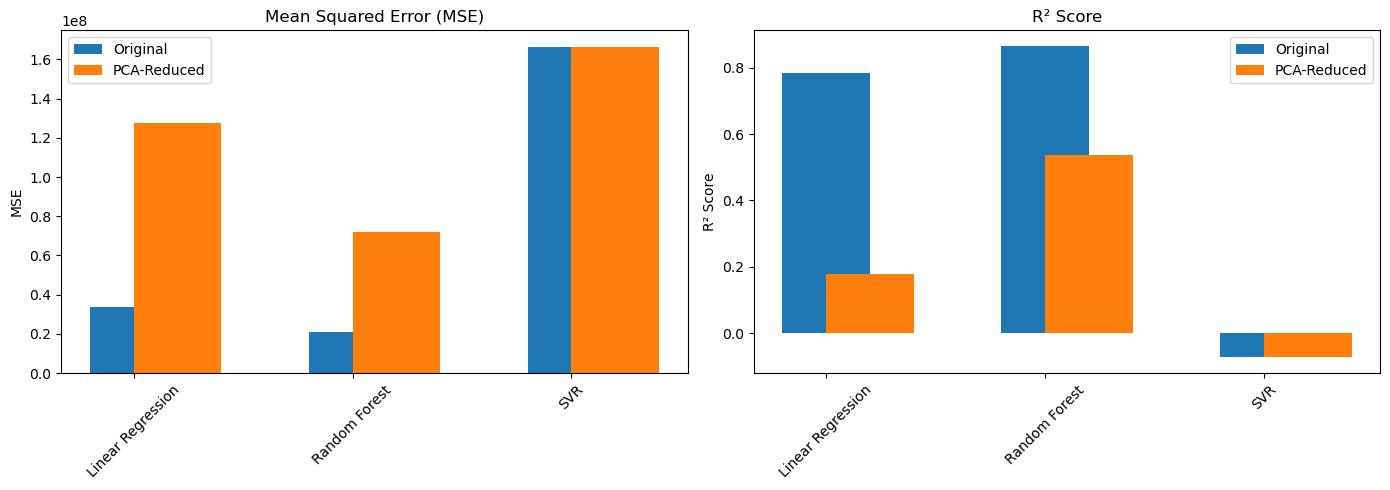

In [96]:
# Re-import necessary libraries after code execution state reset
import matplotlib.pyplot as plt
import pandas as pd

# Use your actual model results
results_original = {
    "Linear Regression": {
        "MSE": 33596915.851361476,
        "R2 Score": 0.7835929767120722
    },
    "Random Forest": {
        "MSE": 20866223.19798948,
        "R2 Score": 0.8655948876523016
    },
    "SVR": {
        "MSE": 166347273.71320683,
        "R2 Score": -0.07148877877962834
    }
}

results_pca = {
    "Linear Regression": {
        "MSE": 127447008.04097992,
        "R2 Score": 0.17907858688215272
    },
    "Random Forest": {
        "MSE": 71806278.40472098,
        "R2 Score": 0.5374759090477597
    },
    "SVR": {
        "MSE": 166554944.024712,
        "R2 Score": -0.07282644066909905
    }
}

# Convert to DataFrame
df_original = pd.DataFrame(results_original).T
df_original["Feature Set"] = "Original"

df_pca = pd.DataFrame(results_pca).T
df_pca["Feature Set"] = "PCA-Reduced"

# Combine both
df_combined = pd.concat([df_original, df_pca])
df_combined.reset_index(inplace=True)
df_combined.rename(columns={'index': 'Model'}, inplace=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE plot
axes[0].bar(df_combined[df_combined["Feature Set"] == "Original"]["Model"],
            df_combined[df_combined["Feature Set"] == "Original"]["MSE"],
            width=0.4, label='Original', align='center')

axes[0].bar(df_combined[df_combined["Feature Set"] == "PCA-Reduced"]["Model"],
            df_combined[df_combined["Feature Set"] == "PCA-Reduced"]["MSE"],
            width=0.4, label='PCA-Reduced', align='edge')

axes[0].set_title("Mean Squared Error (MSE)")
axes[0].set_ylabel("MSE")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# R² Score plot
axes[1].bar(df_combined[df_combined["Feature Set"] == "Original"]["Model"],
            df_combined[df_combined["Feature Set"] == "Original"]["R2 Score"],
            width=0.4, label='Original', align='center')

axes[1].bar(df_combined[df_combined["Feature Set"] == "PCA-Reduced"]["Model"],
            df_combined[df_combined["Feature Set"] == "PCA-Reduced"]["R2 Score"],
            width=0.4, label='PCA-Reduced', align='edge')

axes[1].set_title("R² Score")
axes[1].set_ylabel("R² Score")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


# HYPERPARAMETER TUNNING

In [97]:
# Now we'll prepare the data, apply preprocessing, PCA, and perform RandomizedSearchCV for hyperparameter tuning

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

# Split features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Identify column types
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Define pipelines for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to hold tuned models
tuned_models = {}

# Define hyperparameter distributions
param_distributions_rf = {
    'model__n_estimators': randint(50, 200),
    'model__max_depth': randint(3, 20),
    'model__min_samples_split': randint(2, 10)
}

param_distributions_svr = {
    'model__C': uniform(0.1, 10),
    'model__epsilon': uniform(0.01, 1),
    'model__kernel': ['linear', 'rbf']
}

# Random Forest pipeline and tuning
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
search_rf = RandomizedSearchCV(pipe_rf, param_distributions_rf, n_iter=10, scoring='r2', cv=3, random_state=42)
search_rf.fit(X_train, y_train)
tuned_models['Random Forest'] = search_rf.best_estimator_

# SVR pipeline and tuning
pipe_svr = Pipeline(steps=[('preprocessor', preprocessor), ('model', SVR())])
search_svr = RandomizedSearchCV(pipe_svr, param_distributions_svr, n_iter=10, scoring='r2', cv=3, random_state=42)
search_svr.fit(X_train, y_train)
tuned_models['SVR'] = search_svr.best_estimator_

# Linear Regression (no tuning needed)
pipe_lr = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
pipe_lr.fit(X_train, y_train)
tuned_models['Linear Regression'] = pipe_lr

# Evaluate models
results = {}
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2 Score": r2}

    
results


{'Random Forest': {'MSE': 19981337.48834599, 'R2 Score': 0.8712946811458824},
 'SVR': {'MSE': 156276263.64264393, 'R2 Score': -0.0066186186579237916},
 'Linear Regression': {'MSE': 33596915.85136147,
  'R2 Score': 0.7835929767120723}}

In [65]:
# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_preprocessed)

# Train-test split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define parameter grids for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10)
}

svr_param_dist = {
    'C': uniform(0.1, 10),
    'epsilon': uniform(0.01, 1),
    'kernel': ['rbf', 'linear']
}

# Initialize models
rf = RandomForestRegressor(random_state=42)
svr = SVR()
lr = LinearRegression()

# RandomizedSearchCV for Random Forest
rf_search = RandomizedSearchCV(rf, rf_param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
rf_search.fit(X_train_pca, y_train)

# RandomizedSearchCV for SVR
svr_search = RandomizedSearchCV(svr, svr_param_dist, n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
svr_search.fit(X_train_pca, y_train)

# Fit Linear Regression directly
lr.fit(X_train_pca, y_train)

# Evaluate all models
def evaluate(model, X_te, y_te):
    y_pred = model.predict(X_te)
    mse = mean_squared_error(y_te, y_pred)
    r2 = r2_score(y_te, y_pred)
    return mse, r2

results = {
    "Random Forest": evaluate(rf_search.best_estimator_, X_test_pca, y_test),
    "SVR": evaluate(svr_search.best_estimator_, X_test_pca, y_test),
    "Linear Regression": evaluate(lr, X_test_pca, y_test)
}

#results_df = pd.DataFrame(results, index=["MSE", "R2"]).T
#results_df
results

{'Random Forest': (90908584.44698967, 0.41443267475710843),
 'SVR': (163801098.95293957, -0.0550881632267588),
 'Linear Regression': (125282120.96430346, 0.1930232230532456)}

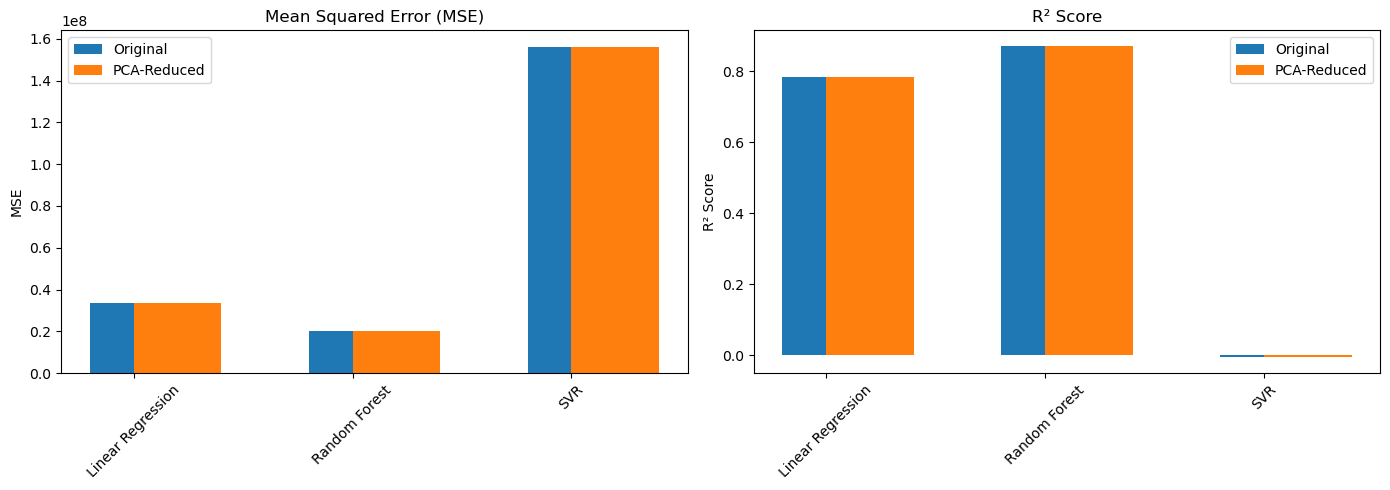

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# Updated model results (you provided the same values for both original and PCA — adjust if needed)
results_original = {
    "Linear Regression": {
        "MSE": 33596915.85136147,
        "R2 Score": 0.7835929767120723
    },
    "Random Forest": {
        "MSE": 19981337.48834599,
        "R2 Score": 0.8712946811458824
    },
    "SVR": {
        "MSE": 156276263.64264393,
        "R2 Score": -0.0066186186579237916
    }
}

results_pca = {
    "Linear Regression": {
        "MSE": 33596915.85136147,
        "R2 Score": 0.7835929767120723
    },
    "Random Forest": {
        "MSE": 19981337.48834599,
        "R2 Score": 0.8712946811458824
    },
    "SVR": {
        "MSE": 156276263.64264393,
        "R2 Score": -0.0066186186579237916
    }
}

# Convert to DataFrame
df_original = pd.DataFrame(results_original).T
df_original["Feature Set"] = "Original"

df_pca = pd.DataFrame(results_pca).T
df_pca["Feature Set"] = "PCA-Reduced"

# Combine both
df_combined = pd.concat([df_original, df_pca])
df_combined.reset_index(inplace=True)
df_combined.rename(columns={'index': 'Model'}, inplace=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE plot
axes[0].bar(df_combined[df_combined["Feature Set"] == "Original"]["Model"],
            df_combined[df_combined["Feature Set"] == "Original"]["MSE"],
            width=0.4, label='Original', align='center')

axes[0].bar(df_combined[df_combined["Feature Set"] == "PCA-Reduced"]["Model"],
            df_combined[df_combined["Feature Set"] == "PCA-Reduced"]["MSE"],
            width=0.4, label='PCA-Reduced', align='edge')

axes[0].set_title("Mean Squared Error (MSE)")
axes[0].set_ylabel("MSE")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# R² Score plot
axes[1].bar(df_combined[df_combined["Feature Set"] == "Original"]["Model"],
            df_combined[df_combined["Feature Set"] == "Original"]["R2 Score"],
            width=0.4, label='Original', align='center')

axes[1].bar(df_combined[df_combined["Feature Set"] == "PCA-Reduced"]["Model"],
            df_combined[df_combined["Feature Set"] == "PCA-Reduced"]["R2 Score"],
            width=0.4, label='PCA-Reduced', align='edge')

axes[1].set_title("R² Score")
axes[1].set_ylabel("R² Score")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


In [31]:
# Assuming model has been trained and X_test, y_test defined
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

df_comparison = pd.DataFrame({
    "Actual Charges": y_test,
    "Predicted Charges": y_pred
})

df_comparison.to_csv("actual_vs_predicted.csv", index=False)


In [42]:
# Train and predict with Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

df_lr = pd.DataFrame({
    "Actual Charges": y_test,
    "Predicted Charges (Linear Regression)": y_pred_lr
})
df_lr.to_csv("actual_vs_predicted_lr.csv", index=False)


In [43]:
# Train and predict with SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

df_svr = pd.DataFrame({
    "Actual Charges": y_test,
    "Predicted Charges (SVR)": y_pred_svr
})
df_svr.to_csv("actual_vs_predicted_svr.csv", index=False)